In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [64]:
data = pd.read_csv('WineQT.csv')
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
283,12.0,0.390,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8,7,407
67,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.7,5,96
188,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5,264
403,7.6,0.290,0.49,2.7,0.092,25.0,60.0,0.99710,3.31,0.61,10.1,6,563
760,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,1079


In [65]:
data = data.drop(columns=['Id'])
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:


np.random.seed(113)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality']), data['quality'], test_size=0.3,
                                                    stratify=data['quality'])

In [82]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=y_train,
              xbins=go.histogram.XBins(size=1)))

fig.update_layout(title='Объем оперций с акциями компании Google',
                    xaxis_title='Дата',
                    yaxis_title='Объем купли/продажи')
fig.show()

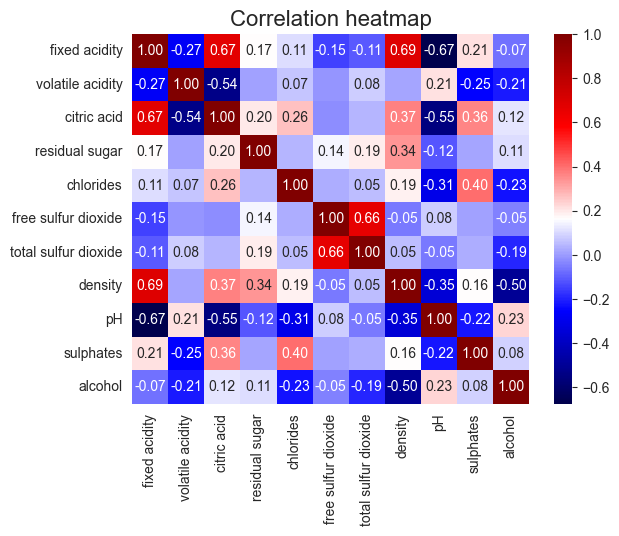

In [67]:
ax = sns.heatmap(X_train.corr(), cmap="seismic",
                 annot=True, fmt="0.2f")
ax.set_title('Correlation heatmap', size=16)
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.05:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [68]:
def calculate_rmse(column):
    return np.sqrt(((column - column.mean()) ** 2).mean())

# Применение функции к каждому столбцу DataFrame
rmse_per_column = X_train.apply(calculate_rmse)

print(rmse_per_column)

fixed acidity            1.761073
volatile acidity         0.179030
citric acid              0.196377
residual sugar           1.214667
chlorides                0.050222
free sulfur dioxide      9.955457
total sulfur dioxide    32.728447
density                  0.001914
pH                       0.156328
sulphates                0.176342
alcohol                  1.075557
dtype: float64


In [69]:
def add_params(X):
    X['total_acid'] = X['fixed acidity'] + X['volatile acidity'] + X['citric acid']
    X['sulphates/acid'] = X['sulphates'] / X['volatile acidity']
    X['sulphates/chlorines'] = X['sulphates'] / X['chlorides']
    X['sulphates*alcohol'] = X['sulphates'] * X['alcohol']
    return X

def mod_dataset(dataset: pd.DataFrame()):
    dataset.drop(columns=['density'], inplace=True)
    dataset = add_params(dataset)
    return dataset

In [70]:
X_train_mod = mod_dataset(X_train)
X_test_mod = mod_dataset(X_test)
X_train.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,total_acid,sulphates/acid,sulphates/chlorines,sulphates*alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,8.100,0.800000,7.368421,5.264
462,15.9,0.360,0.65,7.5,0.096,22.0,71.0,2.98,0.84,14.9,16.910,2.333333,8.750000,12.516
693,7.1,0.360,0.30,1.6,0.080,35.0,70.0,3.44,0.50,9.4,7.760,1.388889,6.250000,4.700
259,12.8,0.615,0.66,5.8,0.083,7.0,42.0,3.07,0.73,10.0,14.075,1.186992,8.795181,7.300
333,9.6,0.540,0.42,2.4,0.081,25.0,52.0,3.20,0.71,11.4,10.560,1.314815,8.765432,8.094


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_mod)
X_test_std = scaler.transform(X_test_mod)


In [72]:
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report



def train_eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

In [73]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter('ignore', category=ConvergenceWarning)

weights = {cl: w for cl, w in zip(np.unique(y_train), compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}

results_stock = pd.DataFrame({'model_name': [], 'test_acc': [], 'test_f1': []})
results_mod = pd.DataFrame({'model_name': [], 'test_acc': [], 'test_f1': []})
results_mod_normalised = pd.DataFrame({'model_name': [], 'test_acc': [], 'test_f1': []})



for model in [RidgeClassifier(max_iter=5000, class_weight=weights), LogisticRegression(max_iter=5000, class_weight=weights), CatBoostClassifier(silent=True, class_weights=weights)]:
    acc, f1 = train_eval_model(model, X_train, X_test, y_train, y_test)
    results_stock.loc[len(results_stock)] = [type(model).__name__, acc, f1]


for model in [RidgeClassifier(max_iter=5000, class_weight=weights), LogisticRegression(max_iter=5000, class_weight=weights), CatBoostClassifier(silent=True, class_weights=weights)]:
    acc, f1 = train_eval_model(model, X_train_mod, X_test_mod, y_train, y_test)
    results_mod.loc[len(results_mod)] = [type(model).__name__, acc, f1]
    
for model in [RidgeClassifier(max_iter=5000, class_weight=weights), LogisticRegression(max_iter=5000, class_weight=weights), CatBoostClassifier(silent=True, class_weights=weights)]:
    acc, f1 = train_eval_model(model, X_train_std, X_test_std, y_train, y_test)
    results_mod_normalised.loc[len(results_mod_normalised)] = [type(model).__name__, acc, f1]


results_stock

,model_name,test_acc,test_f1
0,RidgeClassifier,0.278481,0.344967
1,LogisticRegression,0.299110,0.423387
2,CatBoostClassifier,0.321570,0.620908


In [74]:
results_mod

,model_name,test_acc,test_f1
0,RidgeClassifier,0.278481,0.344967
1,LogisticRegression,0.299110,0.423387
2,CatBoostClassifier,0.321570,0.620908


In [75]:
results_mod_normalised

,model_name,test_acc,test_f1
0,RidgeClassifier,0.277701,0.337495
1,LogisticRegression,0.327043,0.475940
2,CatBoostClassifier,0.321570,0.620908


In [76]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.72      0.71      0.71       145
           6       0.62      0.64      0.63       138
           7       0.49      0.58      0.53        43
           8       0.00      0.00      0.00         5

    accuracy                           0.63       343
   macro avg       0.30      0.32      0.31       343
weighted avg       0.61      0.63      0.62       343


C:\Users\slava\PycharmProjects\mmad2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\slava\PycharmProjects\mmad2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\slava\PycharmProjects\mmad2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",